In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from tqdm import tqdm

In [2]:
inputFile = "MAESTRO-d6178bdd-identified_variants_merged_protein_regions-main.tsv"
data = pd.read_csv(inputFile,sep='\t',low_memory=False)

In [3]:
data_processed = data[['Peptide'] + [c for c in data.columns if 'intensity_for_peptide_variant' in c]]

In [4]:
data_processed.replace(0.0,np.nan, inplace = True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [5]:
data_processed = data_processed.set_index("Peptide")

In [6]:
data_processed = data_processed.T

In [7]:
data_processed.index = data_processed.index.map(lambda x:'.'.join(x.split('.')[:2]))

In [8]:
def create_label(x):
    if "#Healthy" in x:
        return 1
    elif "#Non-severe-COVID-19" in x:
        return 2
    elif "#Severe-COVID-19" in x:
        return 3
    elif "#Symptomatic-non-COVID-19" in x:
        return 4
    else:
        return 0
data_processed["label"]=data_processed.index.map(lambda x: create_label(x))

In [9]:
data_processed = data_processed[data_processed['label']!=0]

In [10]:
#Filter Data based on NaN for each label
per_label_count = data_processed.groupby('label').count()
filterCondition = (per_label_count >= 18).all()
filter_per_label = per_label_count.loc[:, filterCondition]
filter_column = list(filter_per_label.columns) +['label']
filter_data =  data_processed[filter_column]

In [11]:
for column in tqdm(filter_data):
    if column != "label":
        filter_data[column] = filter_data.groupby("label")[column].transform(lambda x: x.fillna(x.mean()))

  0%|          | 0/90 [00:00<?, ?it/s]/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
11718it [00:46, 253.91it/s]                     


In [12]:
##filter_data.to_csv("filterd_data.tsv", sep="\t")

In [13]:
filter_data

Peptide,"R.[304.207]QQQHLFGSNVTD(C,57.021)SGNF(C,57.021)LFR.S","R.[304.207]QQQHLF(G,304.219)SNVTD(C,57.021)SGNF(C,57.021)LFR.S","K.[304.207]DLLFRDDTV(C,57.021)(L,134.957)A(K,304.207).L","R.[304.207]DDTV(C,58.003)LA(K,304.207).L","K.[304.207]DLLF(R,-18.004)DDTV(C,57.021)LA(K,304.207).L","D.[215.050]LLFRDDTV(C,57.021)LA(K,304.207).L","L.[304.207](L,-18.085)FRDDTV(C,57.021)LA(K,304.207).L","L.[304.207](L,-19.069)FRDDTV(C,57.021)LA(K,304.207).L","K.[304.207]DLLFRDDTV(C,57.021)LA(K,304.207).L","R.[304.207]DDTV(C,73.017)LA(K,304.207).L",...,L.[304.207]FIYYASSLQSGVPSR.F,"K.[304.207]YLGEEYV(K,304.207).A","K.[304.207](Y,347.65)LGEEYV(K,304.207).A","K.[304.207]YLGEEY(V,128.488)(K,304.207).A","K.{52.915}[304.207]YLGEEYV(K,304.207).A","K.[304.207]YLGEE(Y,21.985)V(K,304.207).A","K.[304.207]YL(G,13.987)EEYV(K,304.207).A","K.[304.207]YLGEEY(V,-18.002)(K,304.207).A","K.[304.207]YLGEE(Y,-20.114)V(K,304.207).A",label
_dyn_#Healthy.HC1,0.101284,1.352256,0.272530,0.161400,0.829766,0.694992,3.535461,0.724774,0.578344,0.808526,...,0.076964,1.036398,0.141851,0.340883,0.558244,0.923967,0.205740,0.402553,0.575944,1
_dyn_#Healthy.HC10,0.211214,0.366582,0.296847,0.538968,0.429643,1.577060,0.243451,0.716678,0.076839,0.847366,...,0.088704,0.364994,0.085390,0.475301,0.983455,1.479605,0.295649,0.362402,0.390485,1
_dyn_#Healthy.HC12,0.094757,0.174988,0.147994,0.318642,0.219660,0.428641,0.067269,0.428389,0.039317,0.450523,...,0.044767,0.181119,0.039301,0.204216,0.501524,0.704451,0.148002,0.168630,0.196612,1
_dyn_#Healthy.HC13,0.128179,0.282839,0.277178,0.642530,0.400697,0.500991,0.136155,0.414310,0.067232,0.443427,...,0.074562,0.257560,0.051734,0.307207,0.649983,0.921011,0.217464,0.228259,0.253490,1
_dyn_#Healthy.HC17,0.104670,0.312750,0.932067,0.321994,1.169631,0.476371,0.056200,0.248362,1.227860,0.771015,...,1.075851,0.973180,1.160001,0.417028,0.990605,0.736280,0.236625,0.468425,0.545341,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_dyn_#Symptomatic-non-COVID-19.JBDZ6,0.031197,0.218505,0.113378,0.024963,0.156899,0.099475,0.031423,0.145961,0.215369,0.063957,...,0.024035,0.214488,0.045390,0.101920,0.210421,0.298737,0.073428,0.207698,0.273002,4
_dyn_#Symptomatic-non-COVID-19.JBDZ7,0.063094,0.168100,0.156081,0.070387,0.101725,0.201965,0.152689,0.164619,0.045923,0.027285,...,0.035091,0.255204,0.063081,0.038390,0.209398,0.302147,0.069454,0.089960,0.092086,4
_dyn_#Symptomatic-non-COVID-19.JBDZ8,0.067680,0.249860,0.257619,0.145542,0.182203,0.199284,0.205535,0.234827,0.080977,0.054032,...,0.022490,0.468066,0.085600,0.068202,0.360445,0.520954,0.135149,0.164750,0.173815,4
_dyn_#Symptomatic-non-COVID-19.JBDZ9,0.095905,0.319936,0.271392,0.154095,0.174026,0.187691,0.222670,0.345644,0.081800,0.062108,...,0.029303,0.476537,0.093067,0.060297,0.391418,0.515378,0.132960,0.155510,0.164673,4


In [14]:
# corr1 = filter_data.corr()

In [15]:
# cor_matrix = corr1.abs()

In [16]:
# upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

In [17]:
# to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

In [18]:
# data_processed_1 = filter_data.drop(filter_data.columns[to_drop], axis=1)

In [19]:
data_correlated = filter_data.corr()

In [20]:
data_correlated

Peptide,"R.[304.207]QQQHLFGSNVTD(C,57.021)SGNF(C,57.021)LFR.S","R.[304.207]QQQHLF(G,304.219)SNVTD(C,57.021)SGNF(C,57.021)LFR.S","K.[304.207]DLLFRDDTV(C,57.021)(L,134.957)A(K,304.207).L","R.[304.207]DDTV(C,58.003)LA(K,304.207).L","K.[304.207]DLLF(R,-18.004)DDTV(C,57.021)LA(K,304.207).L","D.[215.050]LLFRDDTV(C,57.021)LA(K,304.207).L","L.[304.207](L,-18.085)FRDDTV(C,57.021)LA(K,304.207).L","L.[304.207](L,-19.069)FRDDTV(C,57.021)LA(K,304.207).L","K.[304.207]DLLFRDDTV(C,57.021)LA(K,304.207).L","R.[304.207]DDTV(C,73.017)LA(K,304.207).L",...,L.[304.207]FIYYASSLQSGVPSR.F,"K.[304.207]YLGEEYV(K,304.207).A","K.[304.207](Y,347.65)LGEEYV(K,304.207).A","K.[304.207]YLGEEY(V,128.488)(K,304.207).A","K.{52.915}[304.207]YLGEEYV(K,304.207).A","K.[304.207]YLGEE(Y,21.985)V(K,304.207).A","K.[304.207]YL(G,13.987)EEYV(K,304.207).A","K.[304.207]YLGEEY(V,-18.002)(K,304.207).A","K.[304.207]YLGEE(Y,-20.114)V(K,304.207).A",label
Peptide,,,,,,,,,,,,,,,,,,,,,
"R.[304.207]QQQHLFGSNVTD(C,57.021)SGNF(C,57.021)LFR.S",1.000000,-0.147077,0.210361,0.757234,0.314623,-0.139965,-0.111310,0.550244,-0.184546,0.029427,...,0.020425,0.050522,0.057934,0.672632,-0.098528,-0.465838,0.458353,-0.049074,-0.013072,-0.028810
"R.[304.207]QQQHLF(G,304.219)SNVTD(C,57.021)SGNF(C,57.021)LFR.S",-0.147077,1.000000,-0.081191,-0.301039,0.224343,0.075407,0.752210,0.120857,0.213769,0.453391,...,-0.068566,0.446632,-0.048867,0.035682,0.164640,0.363800,-0.005968,0.194494,0.257172,-0.136155
"K.[304.207]DLLFRDDTV(C,57.021)(L,134.957)A(K,304.207).L",0.210361,-0.081191,1.000000,0.270530,0.516228,0.214510,-0.217751,0.469216,0.675371,0.232235,...,0.589414,0.696190,0.257834,0.668305,0.716065,0.504976,0.779931,0.820710,0.645906,-0.123189
"R.[304.207]DDTV(C,58.003)LA(K,304.207).L",0.757234,-0.301039,0.270530,1.000000,0.401556,0.040308,-0.174650,0.544857,-0.092249,0.271938,...,0.137580,-0.024334,0.093929,0.530962,0.070399,-0.311223,0.300213,-0.091100,0.038710,-0.055112
"K.[304.207]DLLF(R,-18.004)DDTV(C,57.021)LA(K,304.207).L",0.314623,0.224343,0.516228,0.401556,1.000000,0.489124,0.202960,0.340285,0.751349,0.626106,...,0.631742,0.643159,0.682843,0.456993,0.630185,0.210389,0.214696,0.286956,0.445230,-0.167240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"K.[304.207]YLGEE(Y,21.985)V(K,304.207).A",-0.465838,0.363800,0.504976,-0.311223,0.210389,0.370733,0.126014,0.048999,0.636461,0.371264,...,0.334817,0.674881,0.039150,0.205339,0.810767,1.000000,0.349587,0.786435,0.653427,-0.212112
"K.[304.207]YL(G,13.987)EEYV(K,304.207).A",0.458353,-0.005968,0.779931,0.300213,0.214696,-0.132512,-0.185501,0.390972,0.280202,0.010762,...,0.374954,0.630163,-0.035230,0.869342,0.485958,0.349587,1.000000,0.793462,0.362875,-0.084967
"K.[304.207]YLGEEY(V,-18.002)(K,304.207).A",-0.049074,0.194494,0.820710,-0.091100,0.286956,0.110806,-0.075782,0.242819,0.653842,0.183668,...,0.468134,0.809651,0.044641,0.635377,0.776301,0.786435,0.793462,1.000000,0.687358,-0.128019


In [21]:
corr_matrix = data_correlated.abs()

In [22]:
corr_matrix

Peptide,"R.[304.207]QQQHLFGSNVTD(C,57.021)SGNF(C,57.021)LFR.S","R.[304.207]QQQHLF(G,304.219)SNVTD(C,57.021)SGNF(C,57.021)LFR.S","K.[304.207]DLLFRDDTV(C,57.021)(L,134.957)A(K,304.207).L","R.[304.207]DDTV(C,58.003)LA(K,304.207).L","K.[304.207]DLLF(R,-18.004)DDTV(C,57.021)LA(K,304.207).L","D.[215.050]LLFRDDTV(C,57.021)LA(K,304.207).L","L.[304.207](L,-18.085)FRDDTV(C,57.021)LA(K,304.207).L","L.[304.207](L,-19.069)FRDDTV(C,57.021)LA(K,304.207).L","K.[304.207]DLLFRDDTV(C,57.021)LA(K,304.207).L","R.[304.207]DDTV(C,73.017)LA(K,304.207).L",...,L.[304.207]FIYYASSLQSGVPSR.F,"K.[304.207]YLGEEYV(K,304.207).A","K.[304.207](Y,347.65)LGEEYV(K,304.207).A","K.[304.207]YLGEEY(V,128.488)(K,304.207).A","K.{52.915}[304.207]YLGEEYV(K,304.207).A","K.[304.207]YLGEE(Y,21.985)V(K,304.207).A","K.[304.207]YL(G,13.987)EEYV(K,304.207).A","K.[304.207]YLGEEY(V,-18.002)(K,304.207).A","K.[304.207]YLGEE(Y,-20.114)V(K,304.207).A",label
Peptide,,,,,,,,,,,,,,,,,,,,,
"R.[304.207]QQQHLFGSNVTD(C,57.021)SGNF(C,57.021)LFR.S",1.000000,0.147077,0.210361,0.757234,0.314623,0.139965,0.111310,0.550244,0.184546,0.029427,...,0.020425,0.050522,0.057934,0.672632,0.098528,0.465838,0.458353,0.049074,0.013072,0.028810
"R.[304.207]QQQHLF(G,304.219)SNVTD(C,57.021)SGNF(C,57.021)LFR.S",0.147077,1.000000,0.081191,0.301039,0.224343,0.075407,0.752210,0.120857,0.213769,0.453391,...,0.068566,0.446632,0.048867,0.035682,0.164640,0.363800,0.005968,0.194494,0.257172,0.136155
"K.[304.207]DLLFRDDTV(C,57.021)(L,134.957)A(K,304.207).L",0.210361,0.081191,1.000000,0.270530,0.516228,0.214510,0.217751,0.469216,0.675371,0.232235,...,0.589414,0.696190,0.257834,0.668305,0.716065,0.504976,0.779931,0.820710,0.645906,0.123189
"R.[304.207]DDTV(C,58.003)LA(K,304.207).L",0.757234,0.301039,0.270530,1.000000,0.401556,0.040308,0.174650,0.544857,0.092249,0.271938,...,0.137580,0.024334,0.093929,0.530962,0.070399,0.311223,0.300213,0.091100,0.038710,0.055112
"K.[304.207]DLLF(R,-18.004)DDTV(C,57.021)LA(K,304.207).L",0.314623,0.224343,0.516228,0.401556,1.000000,0.489124,0.202960,0.340285,0.751349,0.626106,...,0.631742,0.643159,0.682843,0.456993,0.630185,0.210389,0.214696,0.286956,0.445230,0.167240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"K.[304.207]YLGEE(Y,21.985)V(K,304.207).A",0.465838,0.363800,0.504976,0.311223,0.210389,0.370733,0.126014,0.048999,0.636461,0.371264,...,0.334817,0.674881,0.039150,0.205339,0.810767,1.000000,0.349587,0.786435,0.653427,0.212112
"K.[304.207]YL(G,13.987)EEYV(K,304.207).A",0.458353,0.005968,0.779931,0.300213,0.214696,0.132512,0.185501,0.390972,0.280202,0.010762,...,0.374954,0.630163,0.035230,0.869342,0.485958,0.349587,1.000000,0.793462,0.362875,0.084967
"K.[304.207]YLGEEY(V,-18.002)(K,304.207).A",0.049074,0.194494,0.820710,0.091100,0.286956,0.110806,0.075782,0.242819,0.653842,0.183668,...,0.468134,0.809651,0.044641,0.635377,0.776301,0.786435,0.793462,1.000000,0.687358,0.128019


In [23]:
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

In [25]:
upper_tri
# f, ax = plt.subplots(figsize=(11, 9))
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
# sns.heatmap(corr_matrix, mask=upper_tri, cmap=cmap, vmax=.3, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})

Peptide,"R.[304.207]QQQHLFGSNVTD(C,57.021)SGNF(C,57.021)LFR.S","R.[304.207]QQQHLF(G,304.219)SNVTD(C,57.021)SGNF(C,57.021)LFR.S","K.[304.207]DLLFRDDTV(C,57.021)(L,134.957)A(K,304.207).L","R.[304.207]DDTV(C,58.003)LA(K,304.207).L","K.[304.207]DLLF(R,-18.004)DDTV(C,57.021)LA(K,304.207).L","D.[215.050]LLFRDDTV(C,57.021)LA(K,304.207).L","L.[304.207](L,-18.085)FRDDTV(C,57.021)LA(K,304.207).L","L.[304.207](L,-19.069)FRDDTV(C,57.021)LA(K,304.207).L","K.[304.207]DLLFRDDTV(C,57.021)LA(K,304.207).L","R.[304.207]DDTV(C,73.017)LA(K,304.207).L",...,L.[304.207]FIYYASSLQSGVPSR.F,"K.[304.207]YLGEEYV(K,304.207).A","K.[304.207](Y,347.65)LGEEYV(K,304.207).A","K.[304.207]YLGEEY(V,128.488)(K,304.207).A","K.{52.915}[304.207]YLGEEYV(K,304.207).A","K.[304.207]YLGEE(Y,21.985)V(K,304.207).A","K.[304.207]YL(G,13.987)EEYV(K,304.207).A","K.[304.207]YLGEEY(V,-18.002)(K,304.207).A","K.[304.207]YLGEE(Y,-20.114)V(K,304.207).A",label
Peptide,,,,,,,,,,,,,,,,,,,,,
"R.[304.207]QQQHLFGSNVTD(C,57.021)SGNF(C,57.021)LFR.S",NaN,0.147077,0.210361,0.757234,0.314623,0.139965,0.111310,0.550244,0.184546,0.029427,...,0.020425,0.050522,0.057934,0.672632,0.098528,0.465838,0.458353,0.049074,0.013072,0.028810
"R.[304.207]QQQHLF(G,304.219)SNVTD(C,57.021)SGNF(C,57.021)LFR.S",NaN,NaN,0.081191,0.301039,0.224343,0.075407,0.752210,0.120857,0.213769,0.453391,...,0.068566,0.446632,0.048867,0.035682,0.164640,0.363800,0.005968,0.194494,0.257172,0.136155
"K.[304.207]DLLFRDDTV(C,57.021)(L,134.957)A(K,304.207).L",NaN,NaN,NaN,0.270530,0.516228,0.214510,0.217751,0.469216,0.675371,0.232235,...,0.589414,0.696190,0.257834,0.668305,0.716065,0.504976,0.779931,0.820710,0.645906,0.123189
"R.[304.207]DDTV(C,58.003)LA(K,304.207).L",NaN,NaN,NaN,NaN,0.401556,0.040308,0.174650,0.544857,0.092249,0.271938,...,0.137580,0.024334,0.093929,0.530962,0.070399,0.311223,0.300213,0.091100,0.038710,0.055112
"K.[304.207]DLLF(R,-18.004)DDTV(C,57.021)LA(K,304.207).L",NaN,NaN,NaN,NaN,NaN,0.489124,0.202960,0.340285,0.751349,0.626106,...,0.631742,0.643159,0.682843,0.456993,0.630185,0.210389,0.214696,0.286956,0.445230,0.167240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"K.[304.207]YLGEE(Y,21.985)V(K,304.207).A",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.349587,0.786435,0.653427,0.212112
"K.[304.207]YL(G,13.987)EEYV(K,304.207).A",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.793462,0.362875,0.084967
"K.[304.207]YLGEEY(V,-18.002)(K,304.207).A",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.687358,0.128019


In [26]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]

In [27]:
# to_drop
len(to_drop)

5594

In [28]:
filter_data = filter_data.drop(columns=to_drop)

In [29]:
filter_data

Peptide,"R.[304.207]QQQHLFGSNVTD(C,57.021)SGNF(C,57.021)LFR.S","R.[304.207]QQQHLF(G,304.219)SNVTD(C,57.021)SGNF(C,57.021)LFR.S","K.[304.207]DLLFRDDTV(C,57.021)(L,134.957)A(K,304.207).L","R.[304.207]DDTV(C,58.003)LA(K,304.207).L","K.[304.207]DLLF(R,-18.004)DDTV(C,57.021)LA(K,304.207).L","D.[215.050]LLFRDDTV(C,57.021)LA(K,304.207).L","L.[304.207](L,-18.085)FRDDTV(C,57.021)LA(K,304.207).L","L.[304.207](L,-19.069)FRDDTV(C,57.021)LA(K,304.207).L","K.[304.207]DLLFRDDTV(C,57.021)LA(K,304.207).L","R.[304.207]DDTV(C,73.017)LA(K,304.207).L",...,-.SLVNLGGSK.-,-.SISISVAR.-,"-.(C,57.021)STSSLLEA(C,57.021)TFR.-","K.[304.207](C,285.143)STSSLLEA(C,57.021)TFR.R","K.[304.207](C,57.021)STSSLLEA(C,101.096)TFR.R","K.[304.207](C,40.001)STSSLLEA(C,57.021)TFR.R","R.[304.207](K,304.207)(C,57.021)STS(S,304.211)LLEA(C,57.021)TFR.R","K.[304.207]YLGEE(Y,21.985)V(K,304.207).A","K.[304.207]YLGEE(Y,-20.114)V(K,304.207).A",label
_dyn_#Healthy.HC1,0.101284,1.352256,0.272530,0.161400,0.829766,0.694992,3.535461,0.724774,0.578344,0.808526,...,0.375684,1.064628,0.481229,0.288268,0.575567,1.403662,1.036205,0.923967,0.575944,1
_dyn_#Healthy.HC10,0.211214,0.366582,0.296847,0.538968,0.429643,1.577060,0.243451,0.716678,0.076839,0.847366,...,0.222758,0.270634,0.921344,0.253836,0.138034,0.277169,0.627401,1.479605,0.390485,1
_dyn_#Healthy.HC12,0.094757,0.174988,0.147994,0.318642,0.219660,0.428641,0.067269,0.428389,0.039317,0.450523,...,0.112696,0.148439,0.912078,0.123318,0.077304,0.176677,0.379841,0.704451,0.196612,1
_dyn_#Healthy.HC13,0.128179,0.282839,0.277178,0.642530,0.400697,0.500991,0.136155,0.414310,0.067232,0.443427,...,0.104841,0.120532,0.763189,0.081661,0.110704,0.231248,0.558447,0.921011,0.253490,1
_dyn_#Healthy.HC17,0.104670,0.312750,0.932067,0.321994,1.169631,0.476371,0.056200,0.248362,1.227860,0.771015,...,0.630937,0.410465,0.621729,0.480600,0.404675,0.831519,0.601393,0.736280,0.545341,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_dyn_#Symptomatic-non-COVID-19.JBDZ6,0.031197,0.218505,0.113378,0.024963,0.156899,0.099475,0.031423,0.145961,0.215369,0.063957,...,0.420368,0.162527,0.513846,0.012714,0.185238,0.246414,0.143612,0.298737,0.273002,4
_dyn_#Symptomatic-non-COVID-19.JBDZ7,0.063094,0.168100,0.156081,0.070387,0.101725,0.201965,0.152689,0.164619,0.045923,0.027285,...,0.458347,0.058012,0.430868,0.258512,0.194524,0.015791,0.146618,0.302147,0.092086,4
_dyn_#Symptomatic-non-COVID-19.JBDZ8,0.067680,0.249860,0.257619,0.145542,0.182203,0.199284,0.205535,0.234827,0.080977,0.054032,...,0.122922,0.124041,0.730470,0.055858,0.086678,0.040985,0.261804,0.520954,0.173815,4
_dyn_#Symptomatic-non-COVID-19.JBDZ9,0.095905,0.319936,0.271392,0.154095,0.174026,0.187691,0.222670,0.345644,0.081800,0.062108,...,0.286510,0.086189,0.584929,0.100935,0.096657,0.041255,0.260975,0.515378,0.164673,4


In [30]:
filter_data = filter_data.sample(frac=1)

In [31]:
filter_data

Peptide,"R.[304.207]QQQHLFGSNVTD(C,57.021)SGNF(C,57.021)LFR.S","R.[304.207]QQQHLF(G,304.219)SNVTD(C,57.021)SGNF(C,57.021)LFR.S","K.[304.207]DLLFRDDTV(C,57.021)(L,134.957)A(K,304.207).L","R.[304.207]DDTV(C,58.003)LA(K,304.207).L","K.[304.207]DLLF(R,-18.004)DDTV(C,57.021)LA(K,304.207).L","D.[215.050]LLFRDDTV(C,57.021)LA(K,304.207).L","L.[304.207](L,-18.085)FRDDTV(C,57.021)LA(K,304.207).L","L.[304.207](L,-19.069)FRDDTV(C,57.021)LA(K,304.207).L","K.[304.207]DLLFRDDTV(C,57.021)LA(K,304.207).L","R.[304.207]DDTV(C,73.017)LA(K,304.207).L",...,-.SLVNLGGSK.-,-.SISISVAR.-,"-.(C,57.021)STSSLLEA(C,57.021)TFR.-","K.[304.207](C,285.143)STSSLLEA(C,57.021)TFR.R","K.[304.207](C,57.021)STSSLLEA(C,101.096)TFR.R","K.[304.207](C,40.001)STSSLLEA(C,57.021)TFR.R","R.[304.207](K,304.207)(C,57.021)STS(S,304.211)LLEA(C,57.021)TFR.R","K.[304.207]YLGEE(Y,21.985)V(K,304.207).A","K.[304.207]YLGEE(Y,-20.114)V(K,304.207).A",label
_dyn_#Healthy.HC28,0.076341,0.301121,1.417788,0.365292,0.498423,0.261009,0.213849,0.932500,0.864131,0.807664,...,0.813980,0.411576,0.370640,0.085505,0.391028,0.527711,0.844497,1.199273,1.209548,1
_dyn_#Severe-COVID-19.XG37,0.046708,0.095120,0.071416,0.514898,0.106887,0.116734,0.070430,0.167095,0.018103,0.455930,...,0.096073,1.387243,0.409667,0.043455,0.072288,0.100224,0.161324,0.323651,0.088204,3
_dyn_#Severe-COVID-19.XG44,0.012038,0.328956,0.925794,0.107657,0.247617,0.036282,0.066887,0.208122,0.547522,0.200860,...,0.579379,0.424473,0.277961,0.126277,1.563736,0.316203,0.461214,0.893331,0.303972,3
_dyn_#Symptomatic-non-COVID-19.JBDZ14,0.094259,0.185329,0.956349,0.302998,1.159294,0.591963,0.038915,0.263765,1.296192,0.737937,...,0.499427,0.340814,0.564353,0.507205,0.281175,0.822795,0.482706,0.799369,0.474480,4
_dyn_#Healthy.HC9,0.094497,0.254848,0.200908,0.111151,0.137870,0.158178,0.239026,0.228600,0.063915,0.041477,...,0.168556,0.072064,0.529178,0.081125,0.124268,0.036990,0.231047,0.390227,0.118989,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_dyn_#Healthy.HC25,1.440071,0.280802,1.299930,0.822844,1.096221,0.204146,0.029664,1.724844,0.283221,0.355586,...,0.445746,0.144509,0.782281,0.627782,0.723678,0.232003,0.471709,0.047050,0.535266,1
_dyn_#Symptomatic-non-COVID-19.JBDZ19,0.021804,0.221827,0.703394,0.084362,0.199288,0.107606,0.070753,0.131401,0.399977,0.133895,...,0.383522,0.560073,0.224323,0.082785,0.665946,0.284110,0.364188,0.766655,0.259347,4
_dyn_#Non-severe-COVID-19.XG7,0.047126,0.198697,0.099334,0.111020,0.081547,0.110058,0.119691,0.134043,0.032140,0.050861,...,0.117501,0.059591,0.326904,0.046094,0.146748,0.019855,0.147394,0.332996,0.115018,2
_dyn_#Non-severe-COVID-19.XG24,0.625346,0.128978,0.736038,0.653696,0.577068,0.156009,0.036232,0.885579,0.145287,0.274493,...,0.375212,0.076606,0.655673,0.537172,0.351625,0.119205,0.234708,0.027770,0.293751,2


In [32]:
y = filter_data[['R.[304.207]QQQHLF(G,304.219)SNVTD(C,57.021)SGNF(C,57.021)LFR.S','label']]
y1 = filter_data[['K.[304.207]DLLFRDDTV(C,57.021)(L,134.957)A(K,304.207).L','label']]
y2 = filter_data[['R.[304.207]DDTV(C,58.003)LA(K,304.207).L','label']]
y3 = filter_data[['D.[215.050]LLFRDDTV(C,57.021)LA(K,304.207).L','label']]

In [33]:
val = y.groupby('label')
val1 = y1.groupby('label')
val2 = y2.groupby('label')
val3 = y3.groupby('label')

In [34]:
val = y[['R.[304.207]QQQHLF(G,304.219)SNVTD(C,57.021)SGNF(C,57.021)LFR.S','label']]
val1 = y1[['K.[304.207]DLLFRDDTV(C,57.021)(L,134.957)A(K,304.207).L','label']]

val2 = y2[['R.[304.207]DDTV(C,58.003)LA(K,304.207).L','label']]
val3 = y3[['D.[215.050]LLFRDDTV(C,57.021)LA(K,304.207).L','label']]

In [35]:
val = val.groupby('label').mean()
val1 = val1.groupby('label').mean()
val2 = val2.groupby('label').mean()
val3 = val3.groupby('label').mean()

In [36]:
# val.index
# val1.index
# val2.index
# val3.index

In [37]:
val['R.[304.207]QQQHLF(G,304.219)SNVTD(C,57.021)SGNF(C,57.021)LFR.S']
val1['K.[304.207]DLLFRDDTV(C,57.021)(L,134.957)A(K,304.207).L']
val2['R.[304.207]DDTV(C,58.003)LA(K,304.207).L']
val3['D.[215.050]LLFRDDTV(C,57.021)LA(K,304.207).L']

label
1    0.471502
2    0.362922
3    0.230505
4    0.280241
Name: D.[215.050]LLFRDDTV(C,57.021)LA(K,304.207).L, dtype: float64

In [38]:
x, y = val.index, val['R.[304.207]QQQHLF(G,304.219)SNVTD(C,57.021)SGNF(C,57.021)LFR.S']
x1,y1 = val1.index, val1['K.[304.207]DLLFRDDTV(C,57.021)(L,134.957)A(K,304.207).L']
x2,y2 = val2.index, val2['R.[304.207]DDTV(C,58.003)LA(K,304.207).L']
x3,y3 = val3.index, val3['D.[215.050]LLFRDDTV(C,57.021)LA(K,304.207).L']

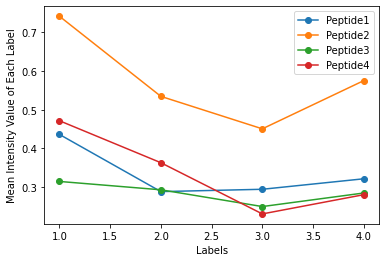

In [39]:
plt.plot(x,y,marker='o')
plt.plot(x1,y1,marker='o')
plt.plot(x2,y2,marker='o')
plt.plot(x3,y3,marker='o')
plt.xlabel('Labels')
plt.ylabel('Mean Intensity Value of Each Label')
plt.legend(['Peptide1','Peptide2','Peptide3','Peptide4'])

In [40]:
a = filter_data['R.[304.207]QQQHLF(G,304.219)SNVTD(C,57.021)SGNF(C,57.021)LFR.S']
a

_dyn_#Healthy.HC28                       0.301121
_dyn_#Severe-COVID-19.XG37               0.095120
_dyn_#Severe-COVID-19.XG44               0.328956
_dyn_#Symptomatic-non-COVID-19.JBDZ14    0.185329
_dyn_#Healthy.HC9                        0.254848
                                           ...   
_dyn_#Healthy.HC25                       0.280802
_dyn_#Symptomatic-non-COVID-19.JBDZ19    0.221827
_dyn_#Non-severe-COVID-19.XG7            0.198697
_dyn_#Non-severe-COVID-19.XG24           0.128978
_dyn_#Healthy.HC4                        0.337347
Name: R.[304.207]QQQHLF(G,304.219)SNVTD(C,57.021)SGNF(C,57.021)LFR.S, Length: 90, dtype: float64

Text(0, 0.5, 'Peptide')

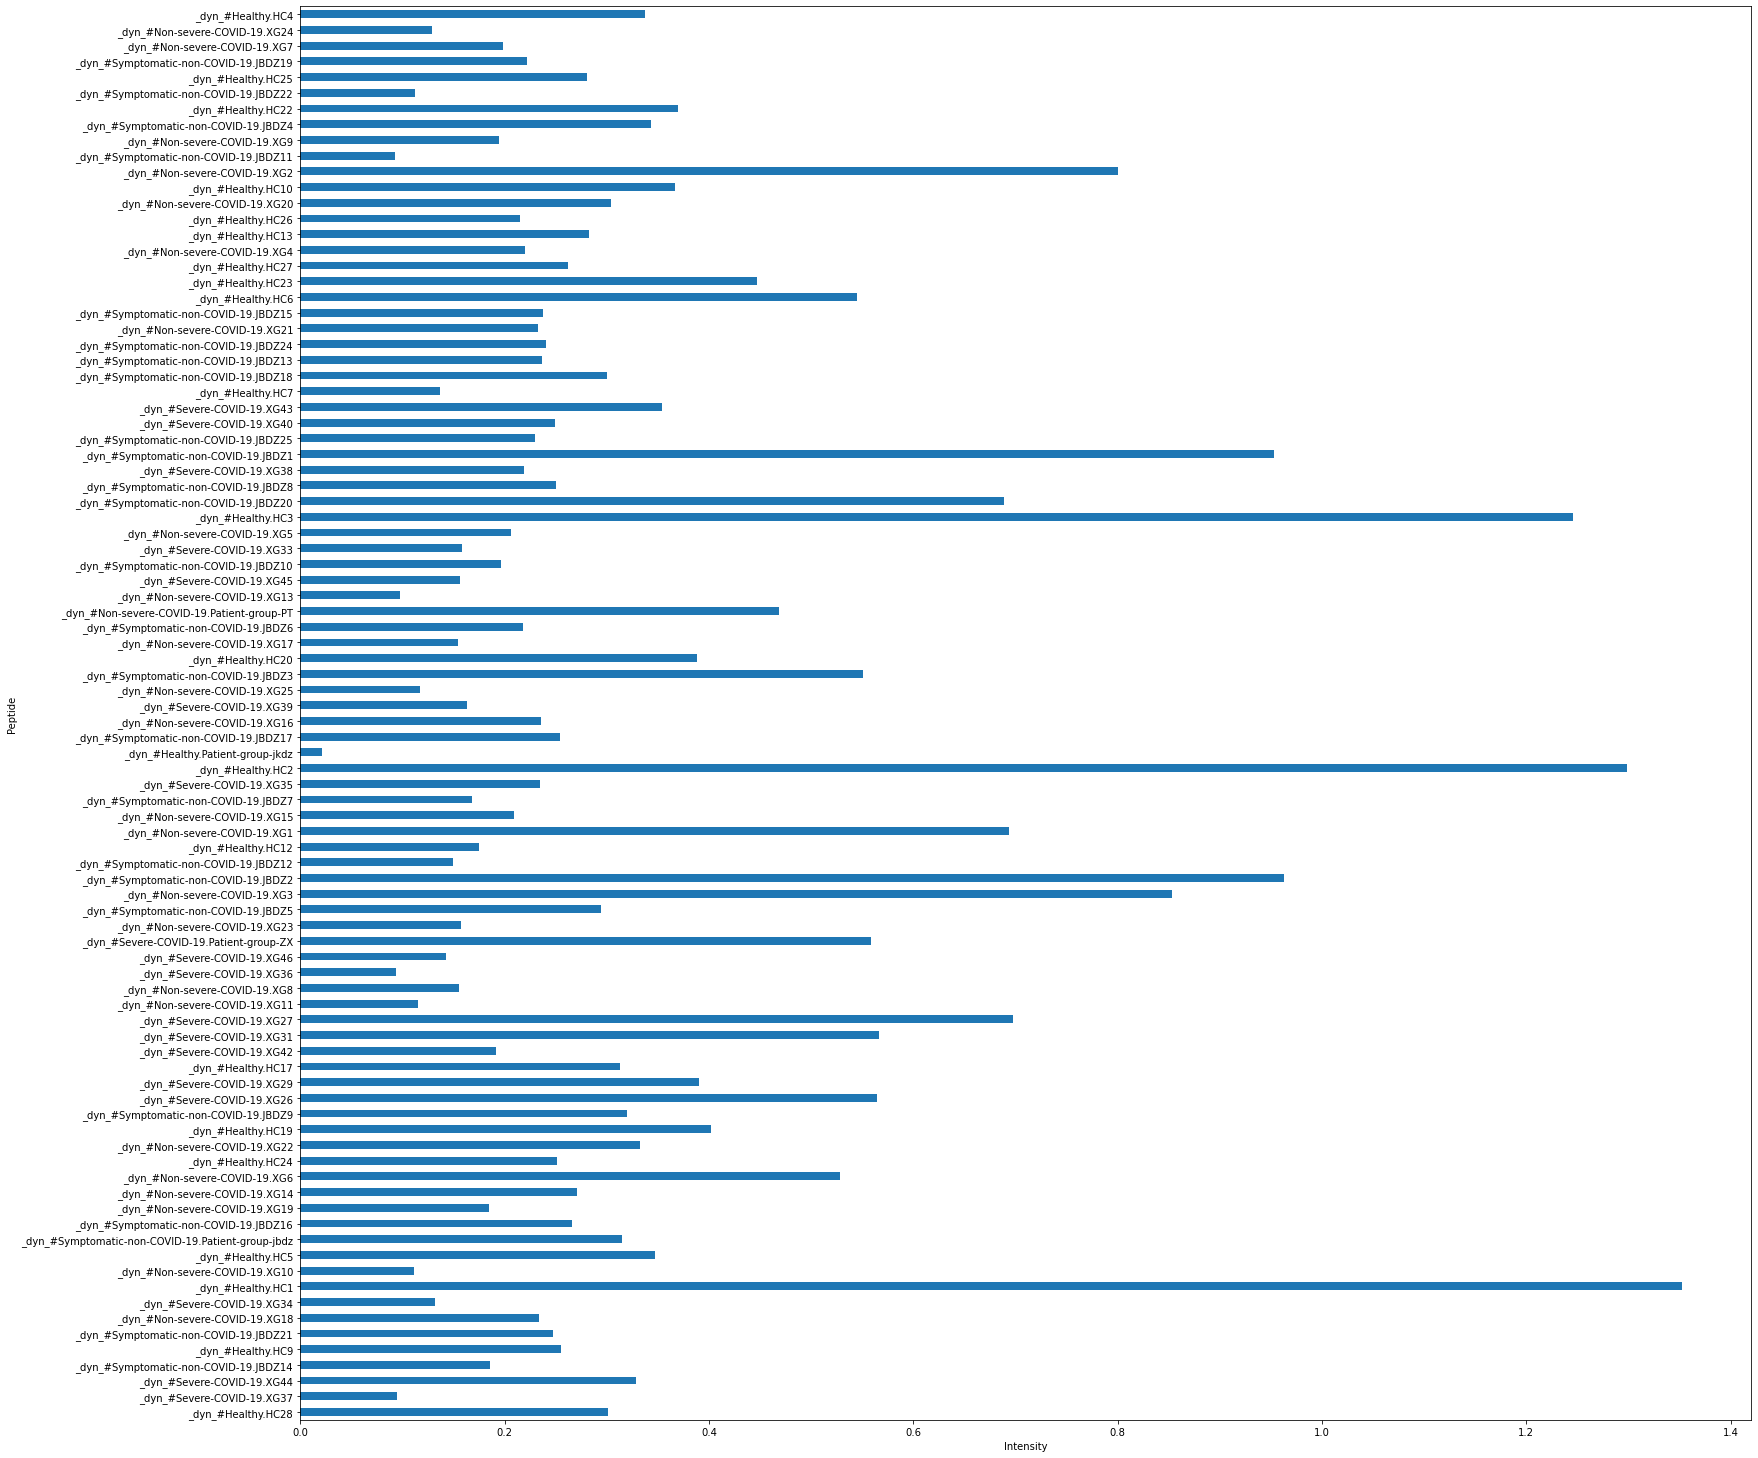

In [48]:
filter_data['R.[304.207]QQQHLF(G,304.219)SNVTD(C,57.021)SGNF(C,57.021)LFR.S'].plot(kind='barh')
plt.rcParams["figure.figsize"] = (36,36)
plt.xlabel('Intensity')
plt.ylabel('Peptide')

In [42]:
x = filter_data[['-.[304.207](L,43.006)(K,304.207)(C,57.021)DEWSVNSVG(K,304.207).I','label']]

In [43]:
x_label = list(x.label) 
len(x_label)

90

In [44]:
y_label = list(x['-.[304.207](L,43.006)(K,304.207)(C,57.021)DEWSVNSVG(K,304.207).I'])

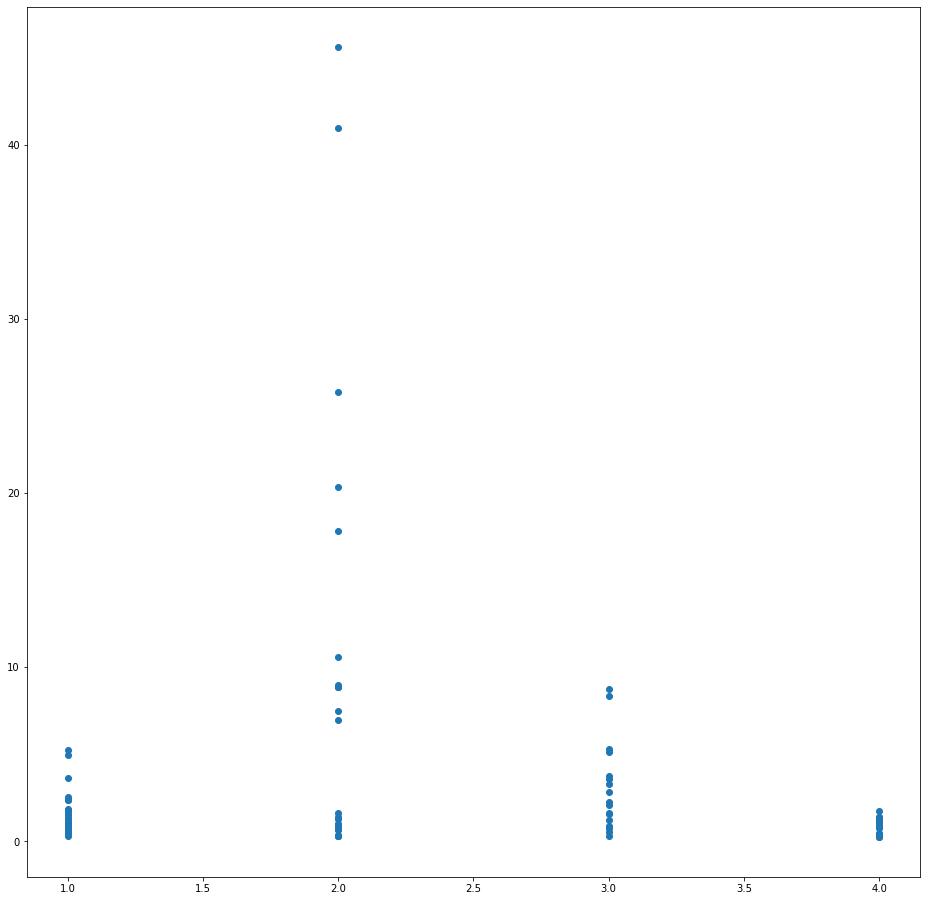

In [51]:
plt.scatter(x_label,y_label)
plt.rcParams["figure.figsize"] = (1,1)

In [52]:
a = np.array(filter_data['R.[304.207]QQQHLF(G,304.219)SNVTD(C,57.021)SGNF(C,57.021)LFR.S'])
a = a.reshape(-1,1)
a.shape

(90, 1)

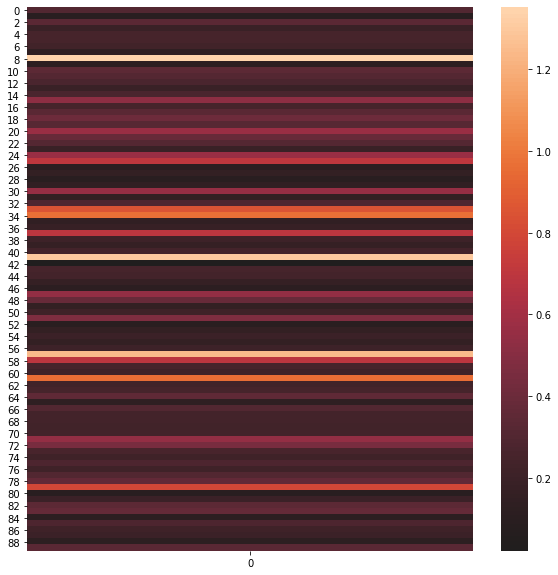

In [55]:
sns.heatmap(a, center=0)
plt.rcParams["figure.figsize"] = (100,100)